# Boston 房价数据集代入Pima处理过程

    整个过程使用数据集boston_2.txt 只有将二值列CHAS作为目标target才能通过特征提取
select_top_4 = SelectKBest(score_func=chi2, k =4) # 通过卡方检验选择4个得分最高的特征
将房价WEDV作为目标出现错误：将目标数组列出，
这样不能预测房价。
    原代码处理的数据目标就是是否糖尿病的二值分类，是否此代码只能处理此类问题？

## 数据集说明：

506,13,,,,,,,,,,,,
"CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"
CRIM：城镇人均犯罪率。
ZN：住宅用地超过 25000 sq.ft. 的比例。
INDUS：城镇非零售商用土地的比例。
CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。
NOX：一氧化氮浓度。
RM：住宅平均房间数。
AGE：1940 年之前建成的自用房屋比例。
DIS：到波士顿五个中心区域的加权距离。
RAD：辐射性公路的接近指数。
TAX：每 10000 美元的全值财产税率。
PTRATIO：城镇师生比例。
B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。
LSTAT：人口中地位低下者的比例。
MEDV：自住房的平均房价，以千美元计。
预测平均值的基准性能的均方根误差（RMSE）是约 9.21 千美元。

In [1]:
# 直接导入数据集
from sklearn.datasets import load_boston
data,target = load_boston(return_X_y = True) # True--导入target
print(data.shape)
data
target

(506, 13)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [2]:
# 加载库
import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

import pandas as pd # 数据科学计算工具
import numpy as np # 数值计算工具
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # matplotlib的高级API
%matplotlib inline # 此行在plt后才起作用
# 在Notebook里面作图/嵌图
%config InlineBackend.figure_format = 'retina'
# 对于 Mac OS X 用户 %config InlineBackend.figure_format='retina' 是另一个有用的选项，
# 它能提升 Matplotlib 图形在 Retina 屏上的质量）生成图形的输出格式：
import warnings # 忽略告警信息模块
warnings.filterwarnings('ignore')

UsageError: unrecognized arguments: # 此行在plt后才起作用


In [20]:
# pima = pd.read_csv("boston_2.txt", sep=',', header=1, names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]) 
pima = pd.DataFrame(data,  columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
# pima.head()
# pima = pima.iloc[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,3]] # iloc[  ] 可以直接指定各列的所有行！
pima
pima13 = pd.DataFrame(target, columns=['MEDV'])
pima13

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [27]:
# count = pd.DataFrame(pd.value_counts(chunk1['Unnamed: 5'].values,  sort=1)) # sort=1降序排列
pd.value_counts(pima['CHAS'].values,  sort=1) # 对DataFrame 分组
#pima.count("CHAS").size() # 按二值分组计数,仅对array数组


0.0    471
1.0     35
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B330588>,
      dtype=object)

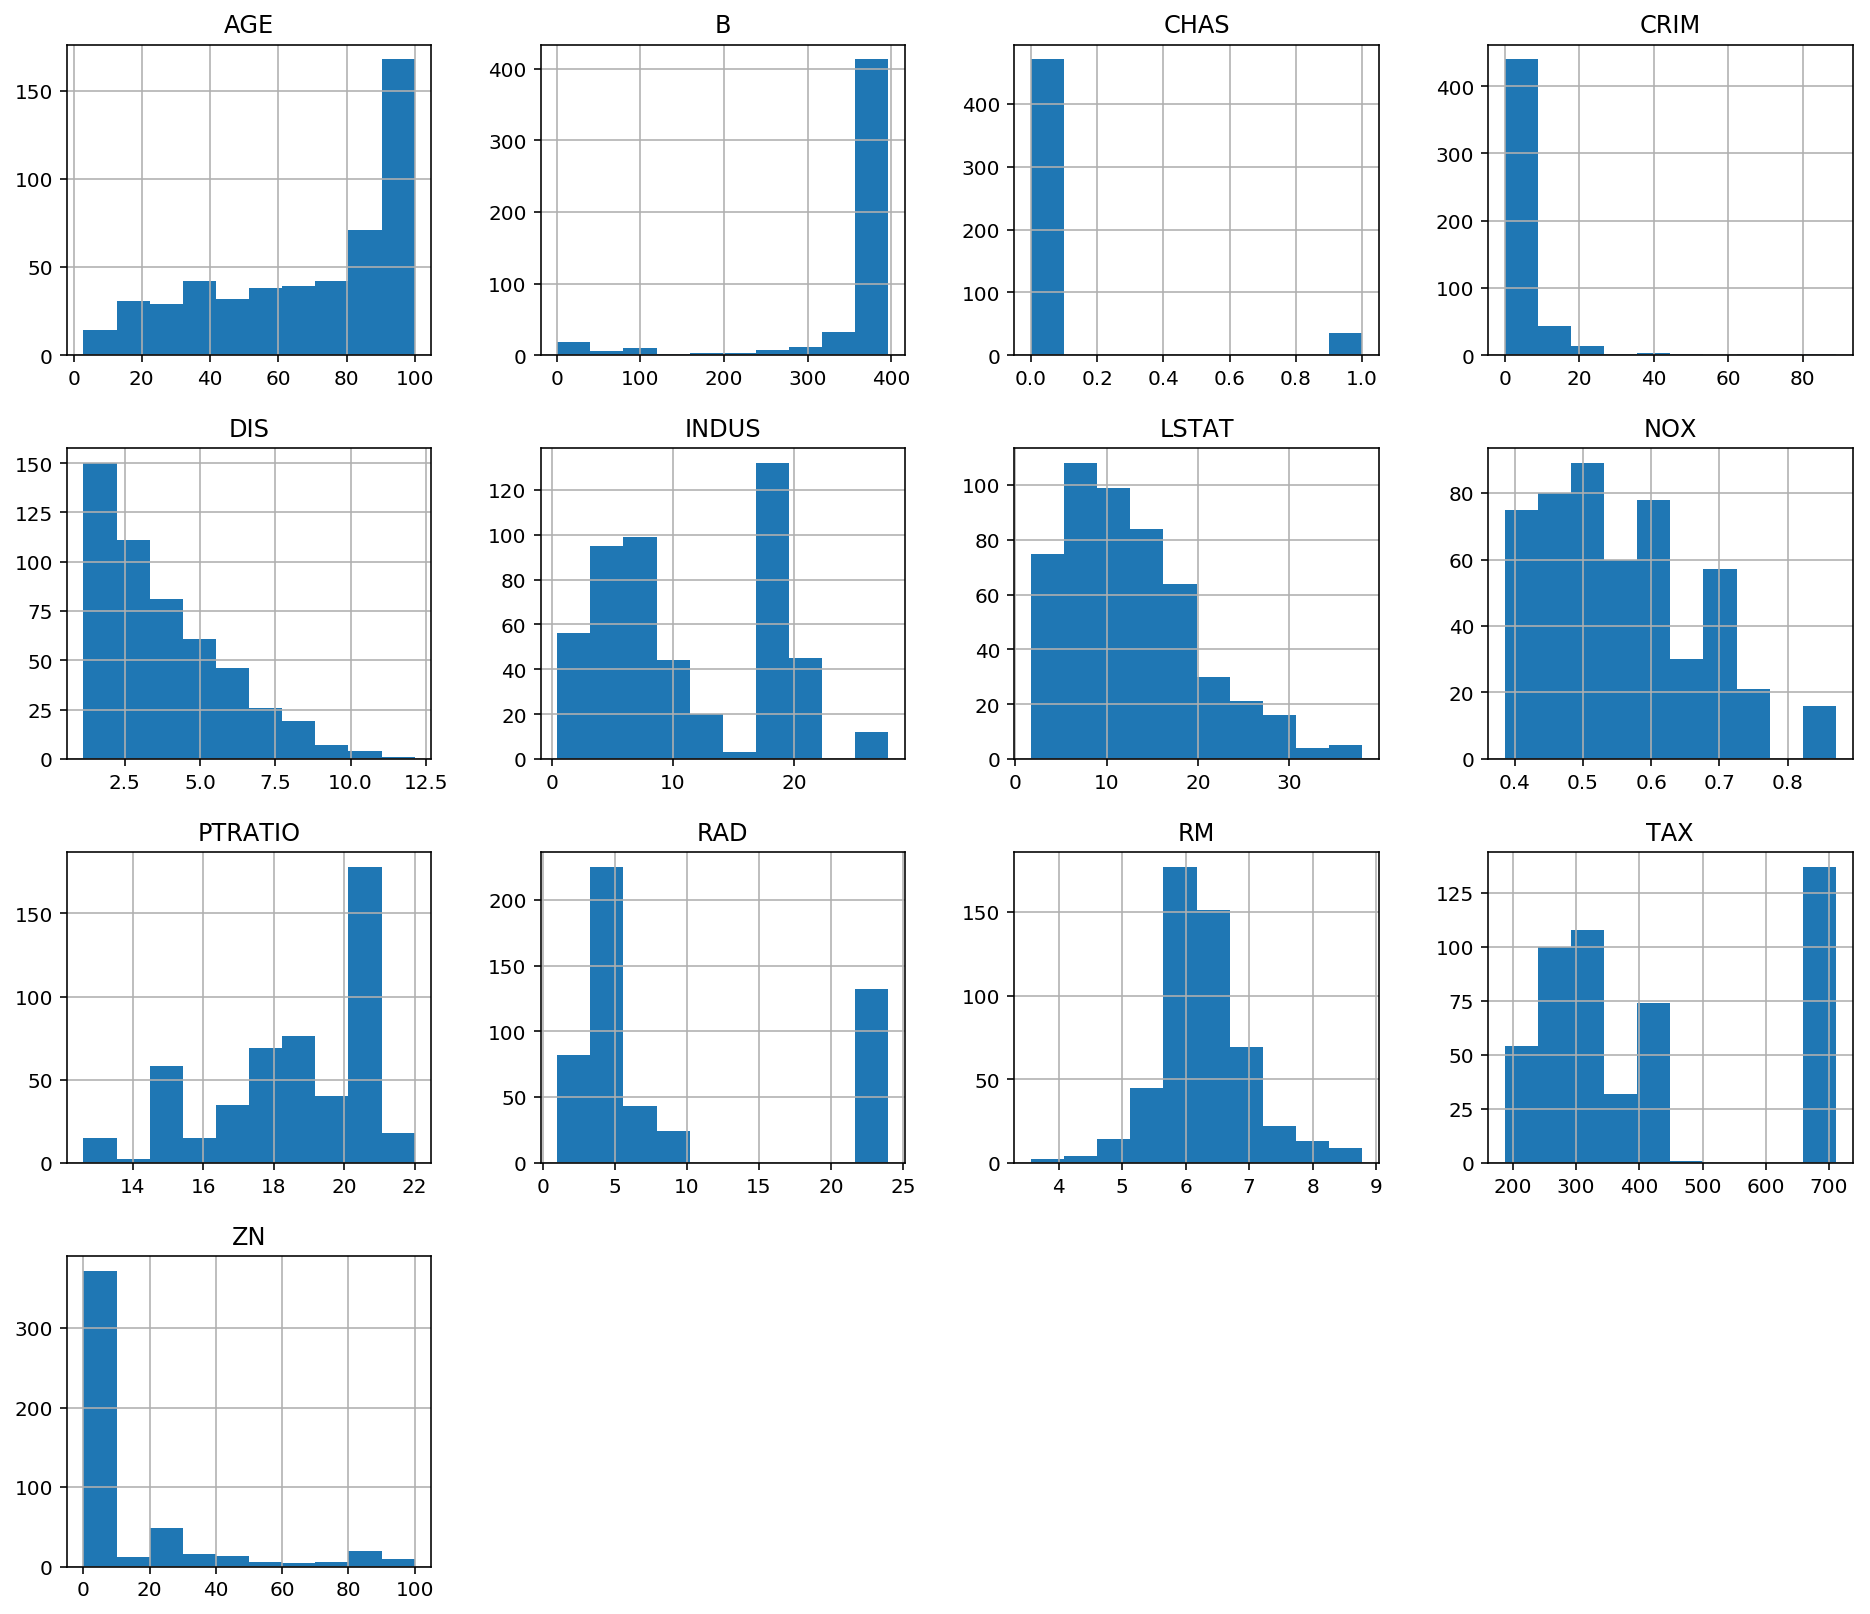

In [28]:
#查看每个字段的数据分布；figsize的参数显示的是每个子图的长和宽
pima.hist(figsize=(16,14)) 

In [29]:
# 各列的偏移度——Jason Brownlee. 正数图像向左。
skew = pima.skew()
print(skew)

CRIM       5.237578
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64


CRIM           AxesSubplot(0.125,0.71587;0.168478x0.16413)
ZN          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
INDUS       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CHAS        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
NOX           AxesSubplot(0.125,0.518913;0.168478x0.16413)
RM         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
AGE        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
DIS        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
RAD           AxesSubplot(0.125,0.321957;0.168478x0.16413)
TAX        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
PTRATIO    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
B          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
LSTAT            AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

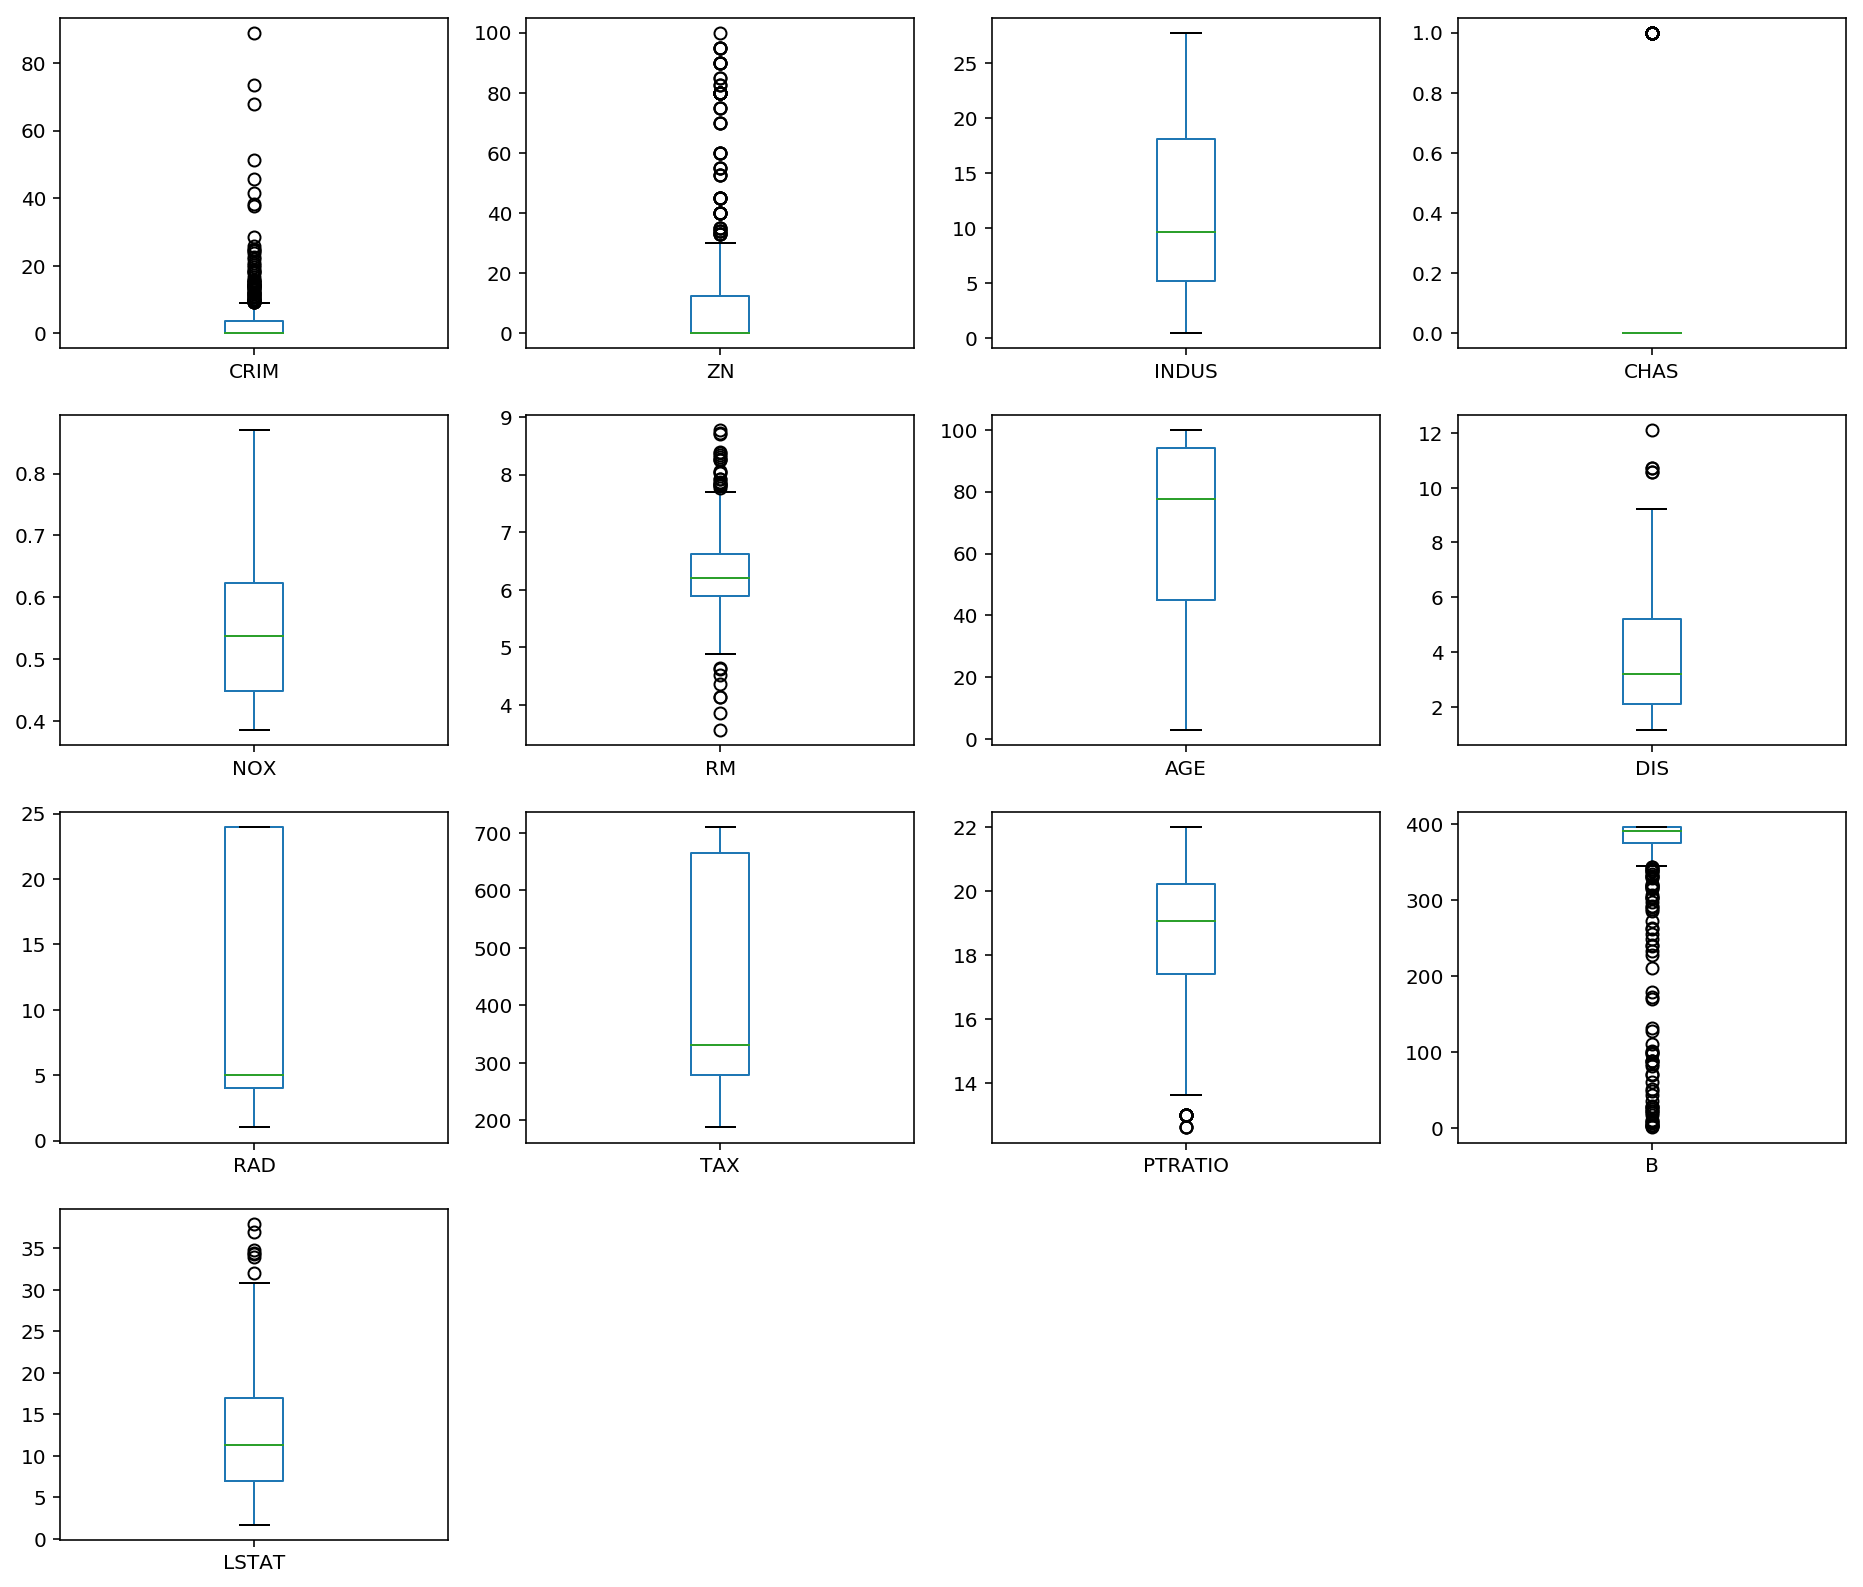

In [30]:
pima.plot(kind='box', subplots=True, layout=(4,4), sharex=False,sharey=False, figsize=(16,14))

In [31]:
column_x = pima.columns[0:len(pima.columns) -1] # 选择特征列，去掉目标列(房价target)
column_x # 显示所有特征列信息

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B'],
      dtype='object')

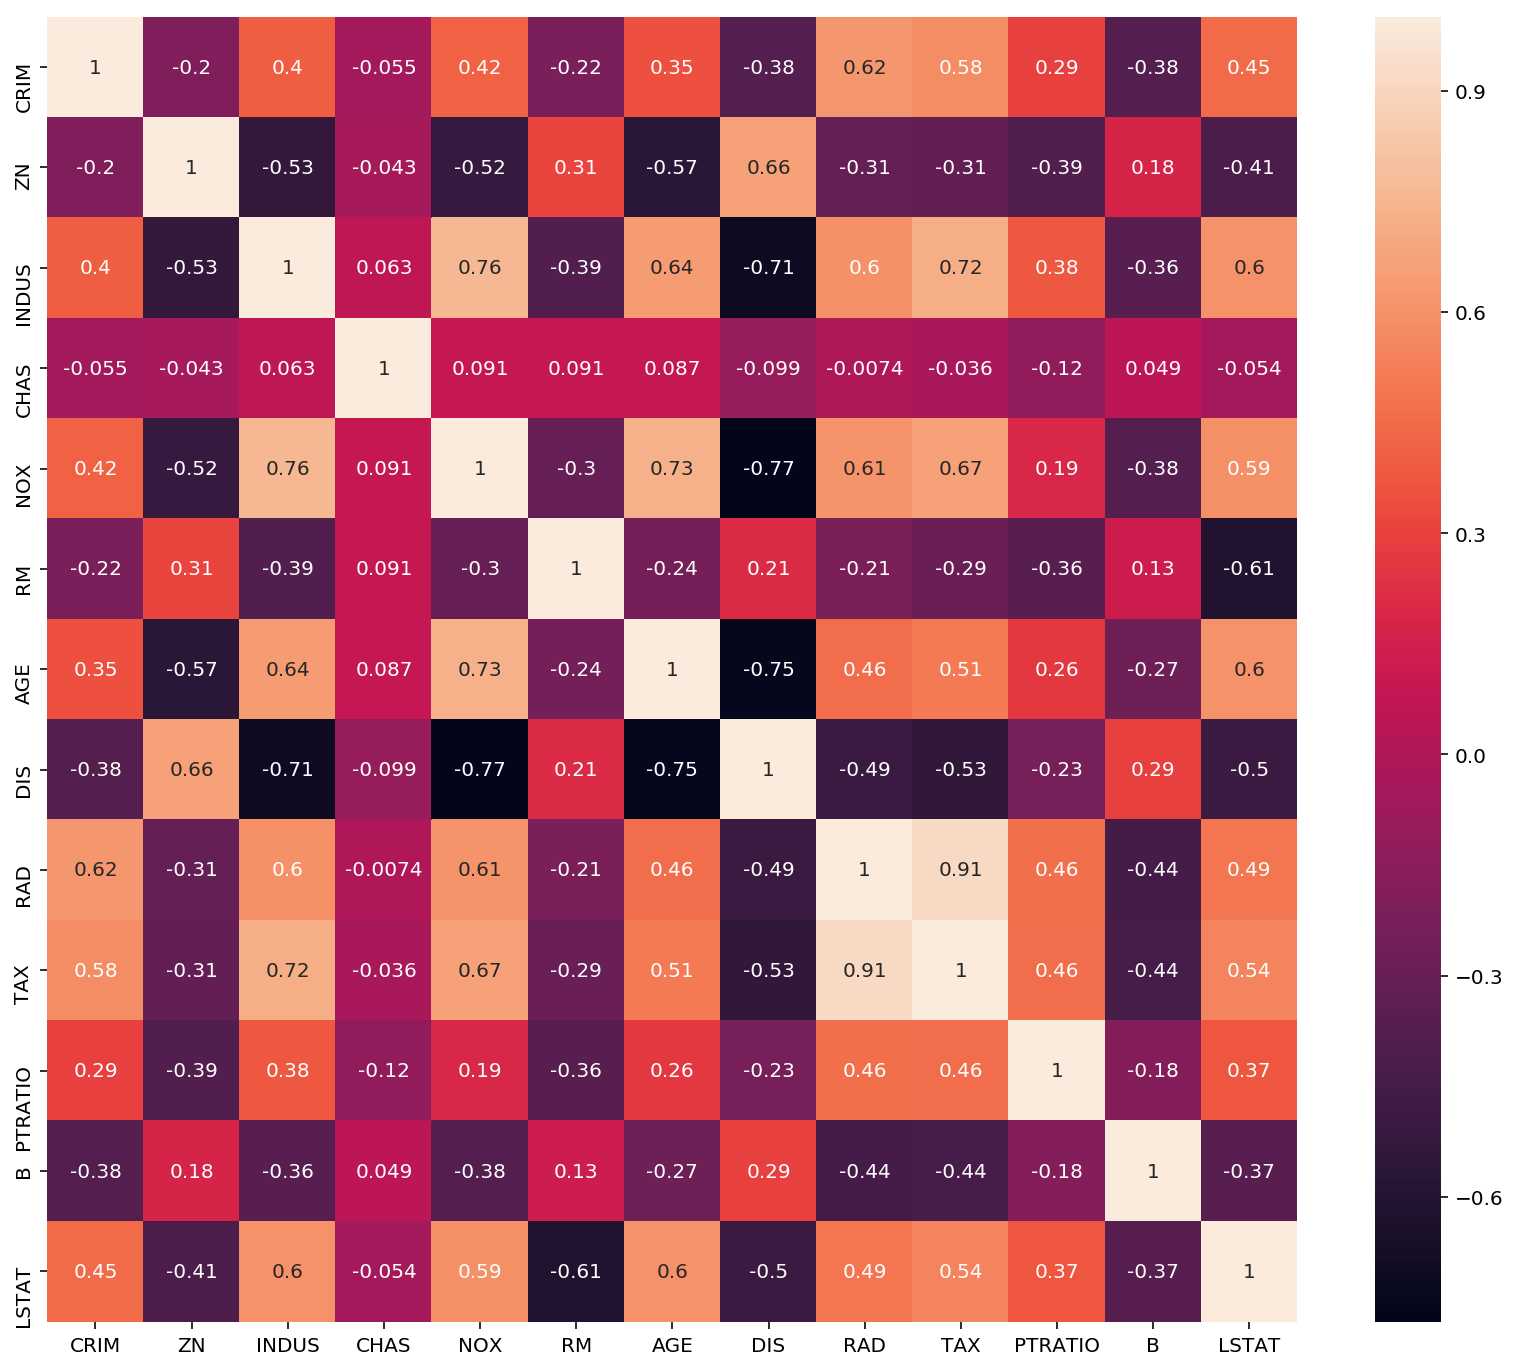

In [32]:
corr = pima[pima.columns].corr() # 计算变量的相关系数，得到一个N * N的矩阵
plt.subplots(figsize=(14,12)) # 可以先试用plt设置画布的大小，然后在作图，修改
sns.heatmap(corr, annot = True) # 使用热度图可视化这个相关系数矩阵

# 4 Feature Extraction 特征提取

In [10]:
# 导入和特征选择相关的包
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

X = data # pima # pima.iloc[:, 0:13] # 特征列 0-12列，不含第13列
# Y = pima['CHAS'] # target # pima13 # pima.iloc[:, 13] # 目标列为第13列
# 只有用CHAS才好用！？
"""
在调用sklearn selectKBest().fit时出现 Unknown label type: 'unknown'错误：
当出现此问题时一般来说是你传入的数据类型被调用函数不接受， 你需要改变数据类型。
例如采用卡方验证选取特征时，如果你传入的是标签是float类型，会产生此错误。
后加上astype(‘int’)即可 例如： .fit(train_x,train_y.astype(‘int’))
特征值不必int，目标值要求int。
"""
Y = target.astype('int')
# print(Y)
select_top_4 = SelectKBest(score_func=chi2, k =4) # 通过卡方检验选择4个得分最高的特征

fit = select_top_4.fit(X, Y) # 获取特征信息和目标值信息
features = fit.transform(X) # 特征转换 (后的数据框),只有4列
features.shape # out: (768, 4)
features[0:5] #新特征列,前5行4列，显示成5X4的矩阵？

array([[6.3200e-03, 1.8000e+01, 2.9600e+02, 3.9690e+02],
       [2.7310e-02, 0.0000e+00, 2.4200e+02, 3.9690e+02],
       [2.7290e-02, 0.0000e+00, 2.4200e+02, 3.9283e+02],
       [3.2370e-02, 0.0000e+00, 2.2200e+02, 3.9463e+02],
       [6.9050e-02, 0.0000e+00, 2.2200e+02, 3.9690e+02]])

In [21]:
pima.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
X_features = pd.DataFrame(data = features, columns=["CRIM", "ZN", "TAX", "B"]) 
# 查看特征矩阵的列值，对照原数据找到列名加入上面的columns里。
# 构造新特征DataFrame
X_features.head() # 显示4列前5行。

,CRIM,ZN,TAX,B
0,0.00632,18.0,296.0,396.90
1,0.02731,0.0,242.0,396.90
2,0.02729,0.0,242.0,392.83
3,0.03237,0.0,222.0,394.63
4,0.06905,0.0,222.0,396.90


# 5 Standardization - 标准化¶
它将属性值更改为 均值为0，标准差为1 的 高斯分布.

In [23]:
from sklearn.preprocessing import StandardScaler

rescaledX = StandardScaler().fit_transform(X_features) 
# 通过sklearn的preprocessing数据预处理中StandardScaler特征缩放 标准化特征信息

X = pd.DataFrame(data = rescaledX, columns = X_features.columns) 
# 构建新特征DataFrame

X.head()

,CRIM,ZN,TAX,B
0,-0.417713,0.284830,-0.666608,0.441052
1,-0.415269,-0.487722,-0.987329,0.441052
2,-0.415272,-0.487722,-0.987329,0.396427
3,-0.414680,-0.487722,-1.106115,0.416163
4,-0.410409,-0.487722,-1.106115,0.441052


# 6 机器学习 - 构建二分类算法模型

In [24]:
from sklearn.model_selection import train_test_split

# 切分数据集为：特征训练集、特征测试集、目标训练集、目标测试集
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 22, test_size = 0.2)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
models.append(("LR", LogisticRegression())) # 逻辑回归
models.append(("NB", GaussianNB())) # 高斯朴素贝叶斯
models.append(("KNN", KNeighborsClassifier())) # K近邻分类
models.append(("DT", DecisionTreeClassifier())) # 决策树分类
models.append(("SVM", SVC())) # 支持向量机分类

results = []
names = []
for name, model in models:
    kflod = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model, X_train,Y_train, cv = kflod,scoring="accuracy")
    names.append(name)
    results.append(cv_result)

for i in range(len(names)):
    print(names[i], results[i].mean)


LR <built-in method mean of numpy.ndarray object at 0x000000000B75DD00>
NB <built-in method mean of numpy.ndarray object at 0x000000000B75DDF0>
KNN <built-in method mean of numpy.ndarray object at 0x000000000B75DEE0>
DT <built-in method mean of numpy.ndarray object at 0x000000000B75DE40>
SVM <built-in method mean of numpy.ndarray object at 0x000000000B75DB70>


## 基于PCA和网格搜索SVM参数

Text(0,0.5,'Second principal component')

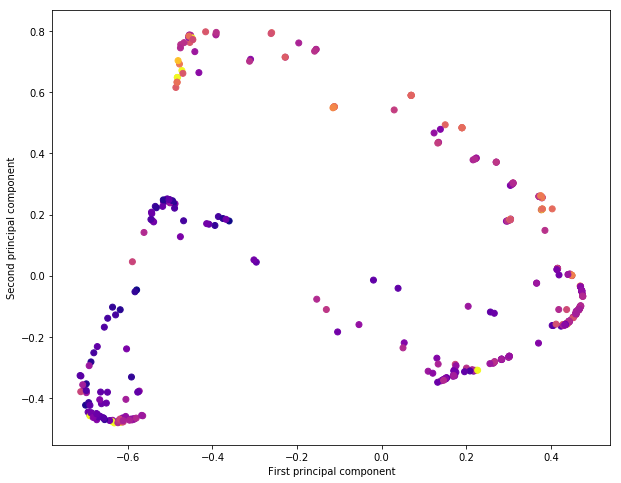

In [25]:
# 【1】 Applying Kernel PCA

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_pca = kpca.fit_transform(X_train)
X_test_pca = kpca.transform(X_test)

plt.figure(figsize=(10,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=Y_train,cmap='plasma')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [26]:
# 【2】SVC

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_pca, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# 使用SVC预测生存

y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(Y_test, y_pred)
cm # out: array([[86, 14],
      #                  [30, 24]], dtype=int64)
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

          5       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         5
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         13       0.10      1.00      0.18         3
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         4
         16       0.00      0.00      0.00         5
         17       0.00      0.00      0.00         6
         18       0.00      0.00      0.00         4
         19       0.05      0.38      0.10         8
         20       0.00      0.00      0.00         8
         21       0.00      0.00      0.00         5
         22       0.00      0.00      0.00         9
         23       0.18      0.25      0.21         8
         24       0.00      0.00      0.00   

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
# 使用 网格搜索 来提高模型

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose = 2)
grid.fit(X_train_pca, Y_train)

# 预测
grid_predictions = grid.predict(X_test_pca)

# 分类报告
print(classification_report(Y_test,grid_predictions))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.1s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 7 可视化结果

[Text(0,0,'LR'),
 Text(0,0,'NB'),
 Text(0,0,'KNN'),
 Text(0,0,'DT'),
 Text(0,0,'SVM')]

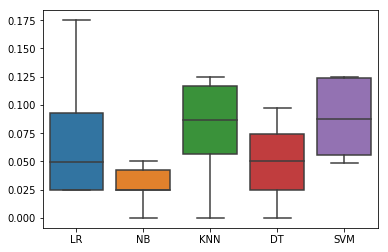

In [29]:
ax = sns.boxplot(data = results)
ax.set_xticklabels(names)

# 8 使用测试数据预测

0.0784313725490196
             precision    recall  f1-score   support

          5       0.50      1.00      0.67         1
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         3
         10       0.00      0.00      0.00         5
         11       0.00      0.00      0.00         1
         12       0.00      0.00      0.00         1
         13       0.11      0.67      0.18         3
         14       0.00      0.00      0.00         2
         15       0.00      0.00      0.00         4
         16       0.00      0.00      0.00         5
         17       0.00      0.00      0.00         6
         18       0.00      0.00      0.00         4
         19       0.06      0.38      0.11         8
         20       0.00      0.00      0.00         8
         21       0.00      0.00      0.00         5
         22       0.05      0.11      0.07         9
         23       0.50      0.12      0.20         8
         24       0.00    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


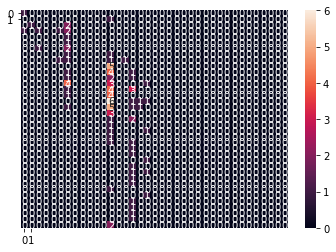

In [30]:
# 使用逻辑回归预测 

lr = LogisticRegression() # LR模型构建
lr.fit(X_train, Y_train) # 
predictions = lr.predict(X_test) # 使用测试值预测

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(accuracy_score(Y_test, predictions)) # 打印评估指标（分类准确率）

print(classification_report(Y_test,predictions)) 

conf = confusion_matrix(Y_test, predictions) # 混淆矩阵

label = ["0","1"] # 
sns.heatmap(conf, annot = True, xticklabels=label, yticklabels=label)

# Is over !